# Data Gathering

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [229]:
df_cards = pd.read_csv('sample_data/cards_data.csv')
df_tranx = pd.read_csv('sample_data/transactions_data.csv')
df_users = pd.read_csv('sample_data/users_data.csv')

In [230]:
df_master = (
    df_cards
    .merge(df_users, left_on='client_id', right_on='id', suffixes=('_card','_user'))
    .merge(df_tranx, left_on='id_card', right_on='card_id')
)

In [231]:
df_master.head(5)

,id_card,client_id_x,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,...,client_id_y,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,...,825,4524,$26.32,Swipe Transaction,54850,Mira Loma,CA,91752.0,4814,NaN
1,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,...,825,4524,$57.82,Swipe Transaction,50072,La Verne,CA,91750.0,5912,NaN
2,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,...,825,4524,$29.46,Swipe Transaction,69374,La Verne,CA,91750.0,5300,NaN
3,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,...,825,4524,$157.04,Swipe Transaction,61195,Mira Loma,CA,91752.0,5541,NaN
4,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,...,825,4524,$13.28,Swipe Transaction,81833,La Verne,CA,91750.0,5912,NaN


# Task A - Data Processing

## 1. Ensure Numeric values for core continuous columns. If not numeric then convert them into appropriate int and float datatypes.

In [232]:
df_master.dtypes

,0
id_card,int64
client_id_x,int64
card_brand,object
card_type,object
card_number,int64
expires,object
cvv,int64
has_chip,object
num_cards_issued,int64
credit_limit,object


In [233]:
numeric_cols = [
    'credit_limit', 'current_age', 'retirement_age', 'birth_year',
    'birth_month', 'latitude', 'longitude', 'per_capita_income',
    'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
    'amount', 'zip', 'mcc'
]

## 2. Check Data Hygiene throughout the data e.g.  Turn “amount” column (with $signs) into a clean number column. “$46.26” ---🡪 46.26

In [234]:
if 'credit_limit' in df_master.columns:
    df_master['credit_limit'] = df_master['credit_limit'].replace('[\$,]', '', regex=True).astype(float)

if 'amount' in df_master.columns:
    df_master['amount'] = df_master['amount'].replace('[\[\$,]', '', regex=True).astype(float)

if 'yearly_income' in df_master.columns:
    df_master['yearly_income'] = df_master['yearly_income'].replace('[\[\$,]', '', regex=True).astype(float)

if 'total_debt' in df_master.columns:
    df_master['total_debt'] = df_master['total_debt'].replace('[\[\$,]', '', regex=True).astype(float)

df_master['yearly_income'] = pd.to_numeric(df_master['yearly_income'], errors='coerce')
df_master['yearly_income'] = df_master['yearly_income'].fillna(0)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\['
<>:11: SyntaxWarning: invalid escape sequence '\['
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:8: SyntaxWarning: invalid escape sequence '\['
<>:11: SyntaxWarning: invalid escape sequence '\['
/tmp/ipython-input-774906142.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_master['credit_limit'] = df_master['credit_limit'].replace('[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-774906142.py:5: SyntaxWarning: invalid escape sequence '\['
  df_master['amount'] = df_master['amount'].replace('[\[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-774906142.py:8: SyntaxWarning: invalid escape sequence '\['
  df_master['yearly_income'] = df_master['yearly_income'].replace('[\[\$,]', '', regex=True).astype(float)
/tmp/ipython-input-774906142.py:11: SyntaxWarning: invalid

## 3. Check how many duplicate rows are there, handle them.

In [235]:
df_master.duplicated().sum()

np.int64(0)

In [236]:
df_master = df_master.drop_duplicates()

## 4. Display number and columns having missing values. Also visualize and then finally handle them with appropriate action.

In [237]:
df_master.isnull().sum()

,0
id_card,0
client_id_x,0
card_brand,0
card_type,0
card_number,0
expires,0
cvv,0
has_chip,0
num_cards_issued,0
credit_limit,0


In [238]:
missing_counts = df_master.isnull().sum()
print(missing_counts[missing_counts > 0])

merchant_state     8008
zip                8358
errors            49145
dtype: int64


<Axes: >

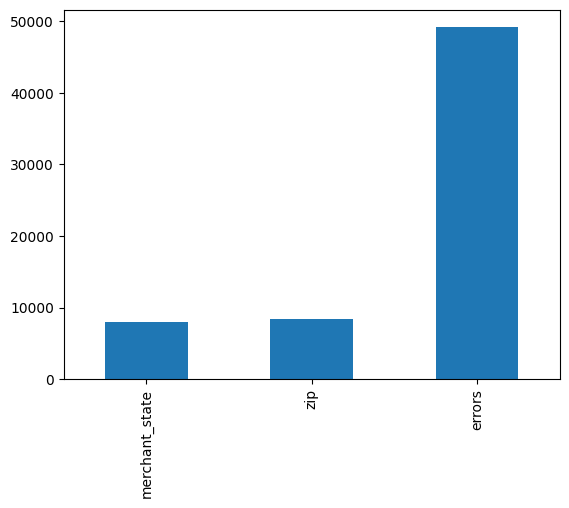

In [239]:
missing_counts[missing_counts > 0].plot(kind='bar')

In [240]:
for col in df_master.columns:
    if df_master[col].dtype in ['int64', 'float64']:
        df_master[col] = df_master[col].fillna(df_master[col].median())
    else:
        df_master[col] = df_master[col].fillna(df_master[col].mode()[0])

In [241]:
df_master.isnull().sum()

,0
id_card,0
client_id_x,0
card_brand,0
card_type,0
card_number,0
expires,0
cvv,0
has_chip,0
num_cards_issued,0
credit_limit,0


In [242]:
df_master.head()

,id_card,client_id_x,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,...,client_id_y,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,...,825,4524,26.32,Swipe Transaction,54850,Mira Loma,CA,91752.0,4814,Insufficient Balance
1,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,...,825,4524,57.82,Swipe Transaction,50072,La Verne,CA,91750.0,5912,Insufficient Balance
2,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,...,825,4524,29.46,Swipe Transaction,69374,La Verne,CA,91750.0,5300,Insufficient Balance
3,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,...,825,4524,157.04,Swipe Transaction,61195,Mira Loma,CA,91752.0,5541,Insufficient Balance
4,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,...,825,4524,13.28,Swipe Transaction,81833,La Verne,CA,91750.0,5912,Insufficient Balance


## 5. Convert the use_chip column to have only three values: swipe, chip, or online.

In [243]:
df_master['use_chip'].unique()

array(['Swipe Transaction', 'Online Transaction'], dtype=object)

In [244]:
df_master['use_chip'] = df_master['use_chip'].replace({
    'Swipe Transaction': 'swipe',
    'Chip Transaction': 'chip',
    'Online Transaction': 'online'
})

In [245]:
df_master['use_chip'].unique()

array(['swipe', 'online'], dtype=object)

## 6. How can you clean up city names, so they don’t have extra spaces and always start with capital letters?

In [246]:
df_master['merchant_city'] = (df_master['merchant_city'].astype(str))

In [247]:
df_master['merchant_city'] = (df_master['merchant_city'].str.strip())

In [248]:
df_master['merchant_city'] = (df_master['merchant_city'].str.title())

In [249]:
df_master['merchant_city'].unique()

array(['Mira Loma', 'La Verne', 'Monterey Park', 'Online', 'Ontario',
       'Rancho Palos Verdes', 'Spring Valley', 'Helendale', 'Florence',
       'Marlton', 'Mount Holly', 'North Las Vegas', 'New Smyrna Beach',
       'Panama City', 'Hawthorne', 'Huntington Park', 'Manhattan Beach',
       'San Mateo', 'Palo Alto', 'Anchorage', 'Rosemead', 'Santa Clara',
       'Scotts Valley', 'Irvine', 'Greenville', 'Hesperia', 'Oakland',
       'Muscatine', 'Davenport', 'Orlando', 'San Antonio', 'Corry',
       'Pulaski', 'Mechanicsville', 'Duarte', 'Lisbon',
       'Huntington Beach', 'Bayside', 'Fallbrook', 'Waianae', 'La Jolla',
       'Waterbury', 'Ormond Beach', 'Redondo Beach', 'Summerville',
       'National Park', 'Brentwood', 'Lake City', 'Las Vegas', 'Lakeside',
       'Melbourne', 'Diamond Bar', 'Sharpsville', 'Williamsburg',
       'Fresh Meadows', 'Syracuse', 'Camden', 'New Hartford',
       'Bellflower', 'Venice', 'Inglewood', 'Arcadia', 'Mount Laurel',
       'Moorestown', 'West Co

## 7. Make sure state codes are always two capital letters (like CA, NY)?

In [250]:
df_master['merchant_state'] = df_master['merchant_state'].astype(str)

In [251]:
df_master['merchant_state'] = df_master['merchant_state'].str.strip()

In [252]:
df_master['merchant_state'] = df_master['merchant_state'].str.upper()

In [253]:
df_master['merchant_state'].unique()

array(['CA', 'SC', 'NJ', 'NV', 'FL', 'AK', 'IA', 'TX', 'PA', 'VA',
       'PORTUGAL', 'NY', 'HI', 'CT', 'WI', 'OH', 'CO', 'MI', 'NC', 'AR',
       'CHINA', 'VT', 'SIERRA LEONE', 'HAITI', 'IL', 'MT', 'TN', 'MD',
       'JAMAICA', 'MO', 'WY', 'ID', 'SOUTH KOREA', 'INDONESIA', 'MA',
       'RI', 'GA', 'AL', 'MEXICO', 'JAPAN', 'UNITED KINGDOM', 'COLOMBIA',
       'AZ', 'CANADA', 'GUATEMALA', 'PERU', 'IN', 'FRANCE', 'NM', 'WA',
       'OR', 'DENMARK', 'KY', 'WV', 'SWEDEN', 'LA', 'MS', 'DE', 'OK',
       'ME', 'MN', 'KS', 'HONG KONG'], dtype=object)

In [254]:
df_master['merchant_state'] = df_master['merchant_state'].str[:2]

In [255]:
df_master['merchant_state'].unique()

array(['CA', 'SC', 'NJ', 'NV', 'FL', 'AK', 'IA', 'TX', 'PA', 'VA', 'PO',
       'NY', 'HI', 'CT', 'WI', 'OH', 'CO', 'MI', 'NC', 'AR', 'CH', 'VT',
       'SI', 'HA', 'IL', 'MT', 'TN', 'MD', 'JA', 'MO', 'WY', 'ID', 'SO',
       'IN', 'MA', 'RI', 'GA', 'AL', 'ME', 'UN', 'AZ', 'GU', 'PE', 'FR',
       'NM', 'WA', 'OR', 'DE', 'KY', 'WV', 'SW', 'LA', 'MS', 'OK', 'MN',
       'KS', 'HO'], dtype=object)

## 8. How do you turn ZIP codes into a proper 5-digit string, keeping leading zeros?

In [256]:
df_master['zip'] = df_master['zip'].astype(str)

In [257]:
df_master['zip'] = df_master['zip'].str.replace('.0', '', regex=False)

In [258]:
df_master['zip'] = df_master['zip'].str.zfill(5)

In [259]:
df_master['zip'].unique()

array(['91752', '91750', '91754', ..., '72801', '01240', '74954'],
      dtype=object)

# Task B - Data Analysis

## 1. Customer Card Profile:

### Explore the user matrix across card_brand, card_type and credit_limit.

In [260]:
df_master['credit_limit'] = pd.to_numeric(df_master['credit_limit'], errors='coerce')
df_master.pivot_table(index='card_brand',columns='card_type',values='credit_limit',aggfunc='mean')

card_type,Credit,Debit,Debit (Prepaid)
card_brand,,,
Amex,8800.000000,NaN,NaN
Discover,11200.000000,NaN,NaN
Mastercard,8988.105553,21767.611726,70.741886
Visa,17955.541482,32747.270724,NaN


### Visualize using appropriate graphs for them.

In [261]:
user_matrix = df_master.pivot_table(index='card_brand',columns='card_type',values='credit_limit',aggfunc='mean')

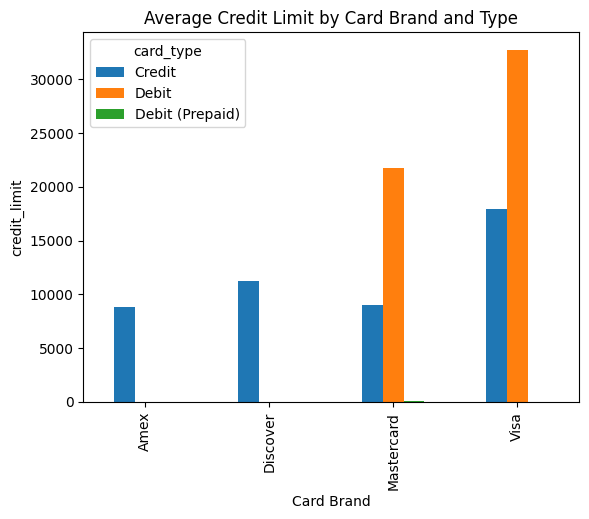

In [262]:
user_matrix.plot(kind='bar')
plt.title("Average Credit Limit by Card Brand and Type")
plt.xlabel("Card Brand")
plt.ylabel("credit_limit")
plt.show()

### Extract insights and recommend actions.

1. User prefer to use Debit card over credit card. Every brand must be introduce thier debit sevices like master card and Visa
2. Users don't prefer Debit(prepaid).
3. Users preferred Visa for spend.

## 2. Explore Transactions:

### What is the time frame of the data collected.

In [263]:
pd.to_datetime(df_master['date'])

,date
0,2010-01-02 16:41:00
1,2010-01-03 06:54:00
2,2010-01-03 11:58:00
3,2010-01-04 06:08:00
4,2010-01-04 16:43:00
...,...
49995,2012-10-17 12:33:00
49996,2012-10-22 08:39:00
49997,2012-10-23 13:07:00
49998,2012-10-23 17:20:00


In [264]:
pd.to_datetime(df_master['date']).min()

Timestamp('2010-01-01 04:45:00')

In [265]:
pd.to_datetime(df_master['date']).max()

Timestamp('2012-10-29 12:55:00')

### Which client has spent the most amount.

In [266]:
df_master.groupby('client_id_x')['amount'].sum().sort_values(ascending=False).head(1)

,amount
client_id_x,
708,326179.31


### Highest and lowest transactions amounts spent.

In [267]:
df_master['amount'].max()

6820.2

In [268]:
df_master['amount'].min()

-500.0

### Transactions amounts within use_chip category.

In [269]:
df_master.groupby('use_chip')['amount'].sum()

,amount
use_chip,
online,438554.98
swipe,2143438.74


### Use appropriate Graphs and extract insights.

In [270]:
chip_usage = df_master.groupby('use_chip')['amount'].sum()

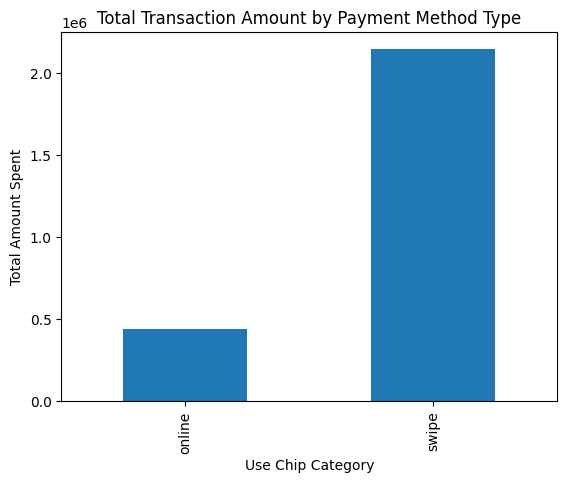

In [271]:
chip_usage.plot(kind='bar')
plt.title("Total Transaction Amount by Payment Method Type")
plt.xlabel("Use Chip Category")
plt.ylabel("Total Amount Spent")
plt.show()

Insights
User mostly use cards offline(swipe).

## 3.Customer Spend Profile vs. Credit Health

### For each client_id, compute: total spend, average ticket size, transaction count, and monthly frequency.

In [272]:
df_master['date'] = pd.to_datetime(df_master['date'])
df_master.groupby('client_id_x').agg(total_spend = ('amount','sum'),avg_ticket_size = ('amount','mean'),transaction_count = ('amount','count'), monthly_frequency = ('date', lambda x: x.dt.to_period('M').nunique()))

,total_spend,avg_ticket_size,transaction_count,monthly_frequency
client_id_x,,,,
68,202013.82,57.098310,3538,34
153,70806.08,55.447204,1277,34
511,285794.61,43.646092,6548,34
708,326179.31,132.917404,2454,34
825,259484.68,81.088962,3200,34
1075,189013.46,35.482159,5327,34
1094,63905.02,42.125920,1517,34
1116,293318.64,67.507167,4345,34
1164,255902.02,98.689556,2593,34


### Create a dataframe for credit_score, yearly_income, total_debt, num_credit_cards.

In [273]:
df_analyze = df_master[['credit_score', 'yearly_income', 'total_debt', 'num_credit_cards']]

In [274]:
df_analyze.head()

,credit_score,yearly_income,total_debt,num_credit_cards
0,787,59696.0,127613.0,5
1,787,59696.0,127613.0,5
2,787,59696.0,127613.0,5
3,787,59696.0,127613.0,5
4,787,59696.0,127613.0,5


### Visualize their co-operation.

In [275]:
df_master[['credit_score', 'yearly_income', 'total_debt', 'num_credit_cards']]

,credit_score,yearly_income,total_debt,num_credit_cards
0,787,59696.0,127613.0,5
1,787,59696.0,127613.0,5
2,787,59696.0,127613.0,5
3,787,59696.0,127613.0,5
4,787,59696.0,127613.0,5
...,...,...,...,...
49995,712,26858.0,11245.0,2
49996,712,26858.0,11245.0,2
49997,712,26858.0,11245.0,2
49998,712,26858.0,11245.0,2


In [276]:
df_analyze = df_master[['credit_score', 'yearly_income', 'total_debt', 'num_credit_cards']]

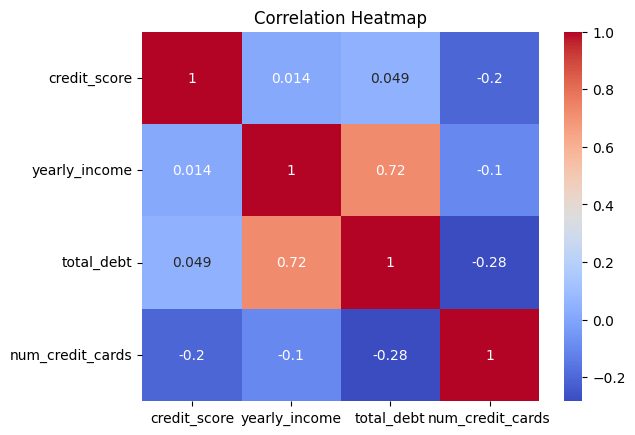

In [277]:
coop = df_analyze.corr()
sns.heatmap(coop, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Plot Scatter of average amount spent vs yearly_income.

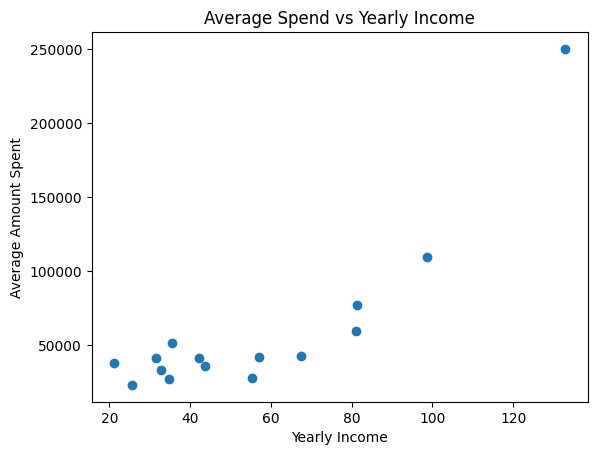

In [278]:
plt.scatter((df_master.groupby('client_id_x')['amount'].mean()), (df_master.groupby('client_id_x')['yearly_income'].mean()))
plt.xlabel("Yearly Income")
plt.ylabel("Average Amount Spent")
plt.title("Average Spend vs Yearly Income")
plt.show()

## 4. Age Portfolio:

### Create appropriate age bands. What share of customers falls in each age band? How does the average credit_limit vary by band?

In [279]:
pd.cut(df_master['current_age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=["<25", "25-34", "35-44", "45-54", "55-64", "65+"])

,current_age
0,45-54
1,45-54
2,45-54
3,45-54
4,45-54
...,...
49995,65+
49996,65+
49997,65+
49998,65+


In [280]:
df_master['age_band'] = pd.cut(df_master['current_age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=["<25", "25-34", "35-44", "45-54", "55-64", "65+"])

In [281]:
df_master['age_band'].value_counts(normalize=True)*100

,proportion
age_band,
65+,46.082
35-44,27.200
25-34,12.290
45-54,9.520
55-64,4.908
<25,0.000


In [282]:
df_master.groupby('age_band')['credit_limit'].mean()

/tmp/ipython-input-2078981373.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_master.groupby('age_band')['credit_limit'].mean()


,credit_limit
age_band,
<25,NaN
25-34,9729.985679
35-44,21939.895515
45-54,19735.473739
55-64,97143.737164
65+,16429.313224


### Visualize age vs chip_usage, income and credit score.

/tmp/ipython-input-3953360543.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chip_age = df_master.groupby('age_band')['use_chip'].value_counts().unstack(fill_value=0)


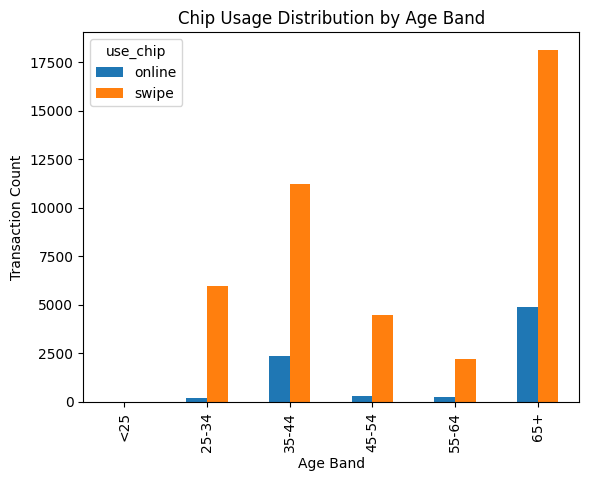

In [283]:
chip_age = df_master.groupby('age_band')['use_chip'].value_counts().unstack(fill_value=0)
chip_age.plot(kind='bar')
plt.title("Chip Usage Distribution by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Transaction Count")
plt.show()

/tmp/ipython-input-1716284504.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income = df_master.groupby('age_band')['yearly_income'].mean()


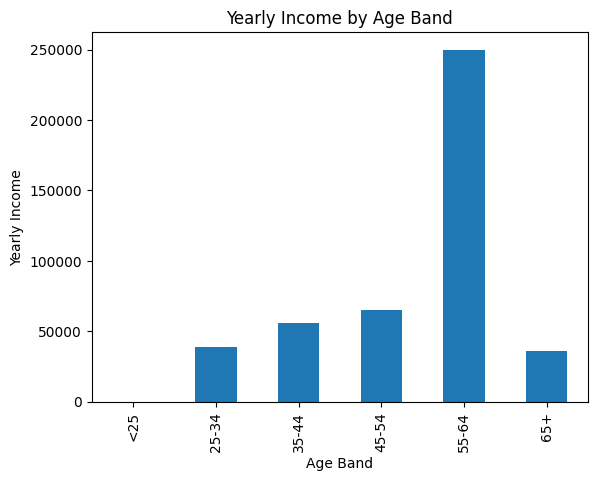

In [287]:
avg_income = df_master.groupby('age_band')['yearly_income'].mean()
avg_income.plot(kind='bar')
plt.title("Yearly Income by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Yearly Income")
plt.show()

/tmp/ipython-input-2824570268.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_age = df_master.groupby('age_band')['credit_score'].mean()


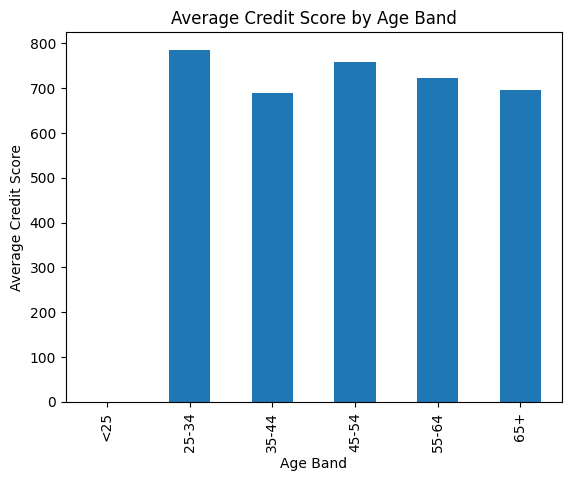

In [285]:
credit_age = df_master.groupby('age_band')['credit_score'].mean()
credit_age.plot(kind='bar')
plt.title("Average Credit Score by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Average Credit Score")
plt.show()

Insights
1. Customer uses swipe and they are mostly 65+
2. 55-64 customer havve more yearly income.
3. Yound customers that is 25-34 have good credit score.

Recommend actions:
1. you can give good credit cards to 55-64 age band customers.
2. Can provide debit cards to 65+ age band customers.

### Are young customers online heavy?

In [291]:
(df_master[df_master['use_chip'] == 'online'].groupby('age_band')['use_chip'].count() /df_master.groupby('age_band')['use_chip'].count())*100

/tmp/ipython-input-2633665863.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df_master[df_master['use_chip'] == 'online'].groupby('age_band')['use_chip'].count() /df_master.groupby('age_band')['use_chip'].count())*100


,use_chip
age_band,
<25,NaN
25-34,3.189585
35-44,17.345588
45-54,6.575630
55-64,9.942950
65+,21.249078


No. Middle age customer are heavy online customer.

## 5. Gender Analysis:

### Avg transaction amount by gender.

In [293]:
df_master.groupby('gender')['amount'].mean()

,amount
gender,
Female,51.678074
Male,51.573033


### Time-of-day / day-of-week profiles: does one group spend more at night/weekends?

In [294]:
df_master['date'] = pd.to_datetime(df_master['date'], errors='coerce')

In [295]:
df_master['hour'] = df_master['date'].dt.hour

In [296]:
df_master['day_of_week'] = df_master['date'].dt.day_name()

In [304]:
df_master.groupby('hour')['amount'].mean().sort_values(ascending=False)

,amount
hour,
0,216.922500
1,99.134000
2,95.481094
3,79.883314
22,72.609640
18,67.938345
19,67.531736
10,67.078018
17,66.477022


In [299]:
df_master.groupby('day_of_week')['amount'].mean().sort_values(ascending=False)

,amount
day_of_week,
Friday,53.238159
Wednesday,53.074606
Saturday,52.587195
Thursday,52.019980
Sunday,50.961996
Tuesday,50.390792
Monday,49.263164


In [300]:
hourly_spend = df_master.groupby('hour')['amount'].mean()

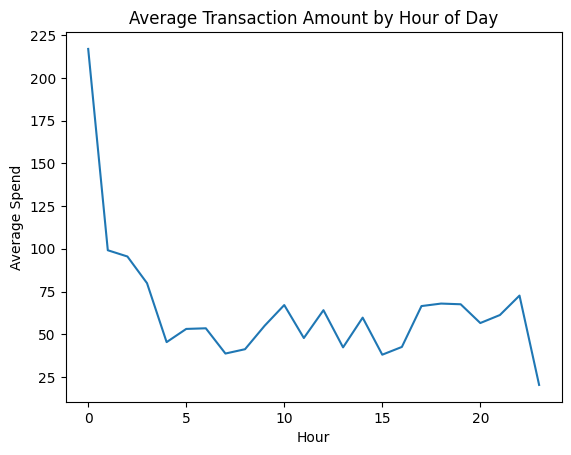

In [301]:
hourly_spend.plot(kind='line')
plt.title("Average Transaction Amount by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Spend")
plt.show()

In [302]:
weekly_spend = df_master.groupby('day_of_week')['amount'].mean()

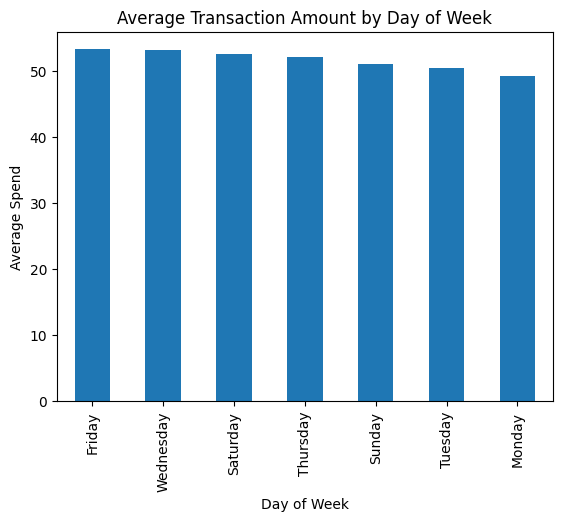

In [306]:
weekly_spend.sort_values(ascending=False).plot(kind='bar')
plt.title("Average Transaction Amount by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Spend")
plt.show()

Suggest marketing campaign ideas.
1. Customers more speds after 6 pm. so, we can run advertisements after 6 pm.
2. Cutmers more  spends after wednesday and more on Friday.